### Import packages and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Import the data

In [2]:
kcdf = pd.read_csv('data/kc_house_data.csv', index_col=0)
pd.options.display.max_columns = None
kcdf.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


# Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).

The `address`, `lat`, and `long` fields have been retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/). In some cases due to missing or incorrectly-entered data from the King County Assessor, this API returned locations outside of King County, WA. If you plan to use the `address`, `lat`, or `long` fields in your modeling, consider identifying outliers prior to including the values in your model.


In [3]:
kcdf.count()

date             30155
price            30155
bedrooms         30155
bathrooms        30155
sqft_living      30155
sqft_lot         30155
floors           30155
waterfront       30155
greenbelt        30155
nuisance         30155
view             30155
condition        30155
grade            30155
heat_source      30123
sewer_system     30141
sqft_above       30155
sqft_basement    30155
sqft_garage      30155
sqft_patio       30155
yr_built         30155
yr_renovated     30155
address          30155
lat              30155
long             30155
dtype: int64

In [4]:
kcdf.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [5]:
kcdf = kcdf.dropna()
kcdf.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [6]:
kcdf.count()

date             30111
price            30111
bedrooms         30111
bathrooms        30111
sqft_living      30111
sqft_lot         30111
floors           30111
waterfront       30111
greenbelt        30111
nuisance         30111
view             30111
condition        30111
grade            30111
heat_source      30111
sewer_system     30111
sqft_above       30111
sqft_basement    30111
sqft_garage      30111
sqft_patio       30111
yr_built         30111
yr_renovated     30111
address          30111
lat              30111
long             30111
dtype: int64

In [7]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30111 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30111 non-null  object 
 1   price          30111 non-null  float64
 2   bedrooms       30111 non-null  int64  
 3   bathrooms      30111 non-null  float64
 4   sqft_living    30111 non-null  int64  
 5   sqft_lot       30111 non-null  int64  
 6   floors         30111 non-null  float64
 7   waterfront     30111 non-null  object 
 8   greenbelt      30111 non-null  object 
 9   nuisance       30111 non-null  object 
 10  view           30111 non-null  object 
 11  condition      30111 non-null  object 
 12  grade          30111 non-null  object 
 13  heat_source    30111 non-null  object 
 14  sewer_system   30111 non-null  object 
 15  sqft_above     30111 non-null  int64  
 16  sqft_basement  30111 non-null  int64  
 17  sqft_garage    30111 non-null  int64  
 1

### Hypothesis
The Null Hypothesis will be that there is no relationship between any of these variables and the price of a house in Kings County.

The Alternative Hypothesis will be that there is some relationship between these variables and the price of a house in Kings County.

### Price target
Price is obviously our dependent variable.  

In [8]:
kcdf_target = kcdf['price']
kcdf_target

id
7399300360     675000.0
8910500230     920000.0
1180000275     311000.0
1604601802     775000.0
8562780790     592500.0
                ...    
7834800180    1555000.0
194000695     1313000.0
7960100080     800000.0
2781280080     775000.0
9557800100     500000.0
Name: price, Length: 30111, dtype: float64

### Which columns to keep?

Are there any variables which will not have an effect on price?

* date
* address

I'll remove these

In [9]:
kcdf = kcdf.drop(columns=['date', 'address'])
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30111 entries, 7399300360 to 9557800100
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30111 non-null  float64
 1   bedrooms       30111 non-null  int64  
 2   bathrooms      30111 non-null  float64
 3   sqft_living    30111 non-null  int64  
 4   sqft_lot       30111 non-null  int64  
 5   floors         30111 non-null  float64
 6   waterfront     30111 non-null  object 
 7   greenbelt      30111 non-null  object 
 8   nuisance       30111 non-null  object 
 9   view           30111 non-null  object 
 10  condition      30111 non-null  object 
 11  grade          30111 non-null  object 
 12  heat_source    30111 non-null  object 
 13  sewer_system   30111 non-null  object 
 14  sqft_above     30111 non-null  int64  
 15  sqft_basement  30111 non-null  int64  
 16  sqft_garage    30111 non-null  int64  
 17  sqft_patio     30111 non-null  int64  
 1

Thats still a lot of variables.  
I'll also remove some that dont seem to be as crucial at this stage, including;
* view
* sqft_above
* sqft_basement
* yr_renovated
* lat
* long

In [10]:
kcdf = kcdf.drop(columns=['view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long'])
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30111 entries, 7399300360 to 9557800100
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         30111 non-null  float64
 1   bedrooms      30111 non-null  int64  
 2   bathrooms     30111 non-null  float64
 3   sqft_living   30111 non-null  int64  
 4   sqft_lot      30111 non-null  int64  
 5   floors        30111 non-null  float64
 6   waterfront    30111 non-null  object 
 7   greenbelt     30111 non-null  object 
 8   nuisance      30111 non-null  object 
 9   condition     30111 non-null  object 
 10  grade         30111 non-null  object 
 11  heat_source   30111 non-null  object 
 12  sewer_system  30111 non-null  object 
 13  sqft_garage   30111 non-null  int64  
 14  sqft_patio    30111 non-null  int64  
 15  yr_built      30111 non-null  int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 3.9+ MB


### Identifying Categorical variables
Now to begin getting an idea of where the categorical variables are, and to begin dealing with these.

In [11]:
print('bedrooms ', kcdf['bedrooms'].nunique())
print('bathrooms ', kcdf['bathrooms'].nunique())
print('sqft_living ', kcdf['sqft_living'].nunique())
print('sqft_lot ', kcdf['sqft_lot'].nunique())
print('floors ', kcdf['floors'].nunique())
print('waterfront ', kcdf['waterfront'].nunique())
print('greenbelt ', kcdf['greenbelt'].nunique())
print('nuisance ', kcdf['nuisance'].nunique())
print('condition ', kcdf['condition'].nunique())
print('grade ', kcdf['grade'].nunique())
print('heat_source ', kcdf['heat_source'].nunique())
print('sewer_system ', kcdf['sewer_system'].nunique())
print('sqft_garage ', kcdf['sqft_garage'].nunique())
print('sqft_patio ', kcdf['sqft_patio'].nunique())
print('yr_built ', kcdf['yr_built'].nunique())

bedrooms  13
bathrooms  21
sqft_living  1314
sqft_lot  12223
floors  7
waterfront  2
greenbelt  2
nuisance  2
condition  5
grade  12
heat_source  7
sewer_system  4
sqft_garage  411
sqft_patio  526
yr_built  123


### Categorical variables
are as follows:
* bedrooms
* bathrooms
* floors
* waterfront
* greenbelt
* nuisance
* condition
* grade
* heat_source
* sewer_system

In [12]:
kcdf_ohe = pd.get_dummies(kcdf, columns=['bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'condition', 'grade', 'heat_source', 'sewer_system'], prefix=['bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'condition', 'grade', 'heat_source', 'sewer_system'], drop_first=True, dtype=np.int64)

In [13]:
kcdf_ohe

,price,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_13,bathrooms_0.5,bathrooms_1.0,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_5.5,bathrooms_6.0,bathrooms_6.5,bathrooms_7.0,bathrooms_7.5,bathrooms_8.0,bathrooms_8.5,bathrooms_9.5,bathrooms_10.0,bathrooms_10.5,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,floors_4.0,waterfront_YES,greenbelt_YES,nuisance_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7399300360,675000.0,1180,7140,0,40,1969,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
8910500230,920000.0,2770,6703,0,240,1950,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1180000275,311000.0,2880,6156,0,0,1956,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1604601802,775000.0,2160,1400,200,270,2010,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
8562780790,592500.0,1120,758,550,30,2012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834800180,1555000.0,1910,4000,0,210,1921,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
194000695,1313000.0,2020,5800,0,520,2011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
7960100080,800000.0,1620,3600,240,110,1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


### Check for Multicollinearity
but first drop the 'price' column

In [14]:
mc_test = kcdf_ohe.drop(columns=['price'])
mc_test

,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_13,bathrooms_0.5,bathrooms_1.0,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_5.5,bathrooms_6.0,bathrooms_6.5,bathrooms_7.0,bathrooms_7.5,bathrooms_8.0,bathrooms_8.5,bathrooms_9.5,bathrooms_10.0,bathrooms_10.5,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,floors_4.0,waterfront_YES,greenbelt_YES,nuisance_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7399300360,1180,7140,0,40,1969,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
8910500230,2770,6703,0,240,1950,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1180000275,2880,6156,0,0,1956,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1604601802,2160,1400,200,270,2010,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
8562780790,1120,758,550,30,2012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834800180,1910,4000,0,210,1921,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
194000695,2020,5800,0,520,2011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
7960100080,1620,3600,240,110,1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [15]:
mc_test_corr = mc_test.corr()
mc_test_corr

,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_13,bathrooms_0.5,bathrooms_1.0,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_5.5,bathrooms_6.0,bathrooms_6.5,bathrooms_7.0,bathrooms_7.5,bathrooms_8.0,bathrooms_8.5,bathrooms_9.5,bathrooms_10.0,bathrooms_10.5,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,floors_4.0,waterfront_YES,greenbelt_YES,nuisance_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
sqft_living,1.000000,0.122271,0.510967,0.396530,0.291242,-0.147184,-0.355999,-0.293510,0.311208,0.361343,0.193332,0.091551,0.049654,0.038136,0.027711,0.002052,0.078423,-0.007183,-0.419279,-0.160692,-0.243984,0.085928,0.191444,0.298319,0.217762,0.306475,0.188710,0.194377,0.131402,0.119809,0.102132,0.091143,0.059543,0.030528,0.071306,0.067648,0.052078,-0.056391,0.404160,0.112056,-0.079806,-0.006767,-0.008548,0.081276,0.116015,-0.059094,-0.053435,-0.063479,-0.037812,-0.030049,0.300823,0.239637,0.174860,-0.008012,-0.023704,-0.059614,-0.141180,-0.299025,-0.315183,0.068736,0.294754,-0.006556,0.273316,0.031869,-0.143052,-0.002970,-0.005215,-0.009285,-0.061600,0.000513
sqft_lot,0.122271,1.000000,0.089318,0.154575,0.001897,0.048683,-0.030151,-0.007705,0.016307,-0.000893,0.002550,-0.000698,-0.001379,-0.003562,0.022720,-0.001284,0.006316,0.000048,0.005230,-0.002727,-0.024998,-0.016664,0.005831,0.018070,0.024657,0.022020,0.022270,0.019412,0.008344,0.010697,0.005897,0.007905,0.013756,0.000217,0.004817,0.027992,0.005310,0.040351,-0.010251,0.009165,-0.046785,-0.005860,-0.008172,0.084860,-0.012706,0.012666,0.040361,0.017214,0.018535,-0.003309,0.049082,0.054775,0.023122,0.012724,0.020796,0.034438,0.042284,0.006944,-0.048850,-0.030817,0.018501,-0.002644,-0.071191,0.001292,0.010227,-0.001386,0.059848,0.002890,-0.360725,-0.002057
sqft_garage,0.510967,0.089318,1.000000,0.216512,0.447720,-0.100965,-0.285512,-0.078461,0.230475,0.126327,0.033366,-0.000063,-0.018361,-0.014486,-0.007353,-0.006666,0.032061,-0.002367,-0.326375,-0.102807,-0.210733,0.251894,0.110980,0.144054,0.069834,0.130788,0.077308,0.089116,0.040250,0.048742,0.045973,0.028910,0.040207,0.013706,0.028511,0.016933,0.009269,-0.201263,0.335193,-0.016081,-0.144684,-0.016237,-0.021377,-0.016775,0.128109,-0.147451,-0.058336,-0.019018,-0.040841,-0.078014,0.178900,0.128216,0.079280,-0.006666,-0.017377,-0.044350,-0.120735,-0.284845,-0.177268,0.093182,0.185548,-0.010929,0.302288,0.003343,-0.198317,-0.010710,-0.009021,-0.007238,-0.122329,-0.000017
sqft_patio,0.396530,0.154575,0.216512,1.000000,0.138112,-0.040040,-0.101707,-0.076371,0.073165,0.117223,0.058394,0.025570,0.007070,-0.000027,-0.001592,-0.003464,0.055740,0.000428,-0.202276,-0.077088,-0.050683,0.009707,0.090954,0.122977,0.083401,0.135447,0.064800,0.084793,0.059030,0.058681,0.035616,0.019167,0.008391,0.026138,0.042613,0.018620,-0.001585,-0.038664,0.105643,0.025260,0.052897,-0.002923,0.004349,0.132170,0.035989,-0.013914,-0.031781,0.024189,-0.011968,0.022866,0.150154,0.125962,0.053497,-0.000410,-0.011255,-0.016157,-0.060181,-0.138029,-0.175459,0.045342,0.151001,0.010221,0.032665,0.014081,-0.100851,-0.005284,0.009748,0.005283,-0.182082,0.005936
yr_built,0.291242,0.001897,0.447720,0.138112,1.000000,-0.090390,-0.112836,-0.041188,0.100704,0.079771,-0.002257,-0.024134,-0.008760,-0.008376,0.002752,0.003387,0.004466,-0.003041,-0.401352,-0.113963,-0.162791,0.329374,0.053130,0.172187,0.043642,0.107375,0.043666,0.056430,0.016434,0.022014,0.017601,0

<Axes: >

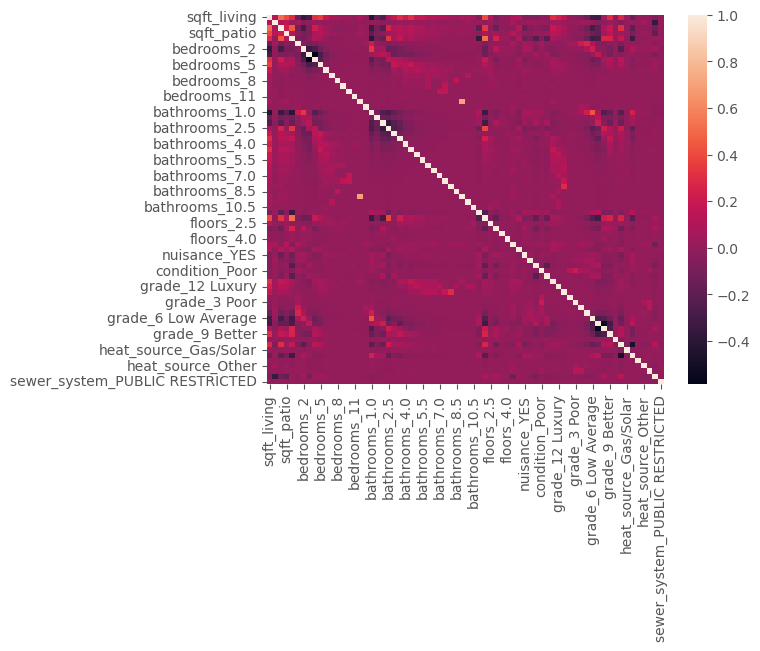

In [16]:
sns.heatmap(mc_test_corr)

In [17]:
df = mc_test.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.7) & (df.cc<1)]

,cc
pairs,
"(bathrooms_9.5, bedrooms_13)",0.707095


only one pair was identified with a correlation greater than 70%.  
if you look carefully, you can see this pairing there on the heatmap.  
I'll remove the bedrooms_13, as it was probably an outlier anyway.

In [18]:
mc_test = mc_test.drop(columns=['bedrooms_13'])
mc_test

,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.5,bathrooms_1.0,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_5.5,bathrooms_6.0,bathrooms_6.5,bathrooms_7.0,bathrooms_7.5,bathrooms_8.0,bathrooms_8.5,bathrooms_9.5,bathrooms_10.0,bathrooms_10.5,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,floors_4.0,waterfront_YES,greenbelt_YES,nuisance_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7399300360,1180,7140,0,40,1969,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
8910500230,2770,6703,0,240,1950,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1180000275,2880,6156,0,0,1956,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1604601802,2160,1400,200,270,2010,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
8562780790,1120,758,550,30,2012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834800180,1910,4000,0,210,1921,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
194000695,2020,5800,0,520,2011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
7960100080,1620,3600,240,110,1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [19]:
preprocessed_kcdf = pd.concat([kcdf_target, mc_test], axis=1)
preprocessed_kcdf

,price,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.5,bathrooms_1.0,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_5.5,bathrooms_6.0,bathrooms_6.5,bathrooms_7.0,bathrooms_7.5,bathrooms_8.0,bathrooms_8.5,bathrooms_9.5,bathrooms_10.0,bathrooms_10.5,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,floors_4.0,waterfront_YES,greenbelt_YES,nuisance_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7399300360,675000.0,1180,7140,0,40,1969,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
8910500230,920000.0,2770,6703,0,240,1950,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1180000275,311000.0,2880,6156,0,0,1956,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1604601802,775000.0,2160,1400,200,270,2010,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
8562780790,592500.0,1120,758,550,30,2012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834800180,1555000.0,1910,4000,0,210,1921,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
194000695,1313000.0,2020,5800,0,520,2011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
7960100080,800000.0,1620,3600,240,110,1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = mc_test
y = kcdf_target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Apply the Linear Regression


In [23]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [24]:
linreg.fit(X_train, y_train)

LinearRegression()

In [25]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 361989151598.2389
Test Mean Squared Error:  421053593422.8103


### Iteration 1

In [28]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     499.4
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:50:18   Log-Likelihood:            -4.4393e+05
No. Observations:               30111   AIC:                         8.880e+05
Df Residuals:                   30041   BIC:                         8.886e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            8.583e+06    3.8e+05     22.576      0.000    7.84e+06    9.33e+06
sqft_living                       279.3528      8.235     33.922      0.000     263.212     295.494
sqft_lot                            0.3113      0.064      4.840      0.000       0.185       0.437
sqft_garage                       -95.1170     17.156     -5.544      0.000    -128.743     -61.491
sqft_patio                        156.3322     16.430      9.515      0.000     124.129     188.536
yr_built                        -3717.6669    178.877    -20.783      0.000   -4068.273   -3367.061
bedrooms_1                      -7.674e+05   1.35e+05     -5.673      0.000   -1.03e+06   -5.02e+05
bedrooms_2                      -1.034e+06   1.32e+05     -7.821      0.000   -1.29e+06   -7.75e+05
bedrooms_3                      -1.061e+06   1.32e+05     -8.024      0.000   -1.32e+06   -8.02e+05
bedrooms_4                      -1.116e+06   1.32e+05     -8.426      0.000   -1.38e+06   -8.56e+05
bedrooms_5                      -1.115e+06   1.33e+05     -8.382      0.000   -1.38e+06   -8.54e+05
bedrooms_6                      -1.209e+06   1.36e+05     -8.918      0.000   -1.48e+06   -9.43e+05
bedrooms_7                      -1.458e+06    1.5e+05     -9.709      0.000   -1.75e+06   -1.16e+06
bedrooms_8                      -1.406e+06   1.67e+05     -8.412      0.000   -1.73e+06   -1.08e+06
bedrooms_9                      -1.806e+06   2.13e+05     -8.467      0.000   -2.22e+06   -1.39e+06
bedrooms_10                     -3.206e+06   3.88e+05     -8.254      0.000   -3.97e+06   -2.44e+06
bedrooms_11                     -9.746e+05   6.27e+05     -1.554      0.120    -2.2e+06    2.55e+05
bathrooms_0.5                    7.117e+05   3.22e+05      2.210      0.027    8.05e+04    1.34e+06
bathrooms_1.0                    8.469e+05   1.67e+05      5.063      0.000    5.19e+05    1.17e+06
bathrooms_1.5                    8.341e+05   1.68e+05      4.975      0.000    5.05e+05    1.16e+06
bathrooms_2.0                    8.492e+05   1.67e+05      5.080      0.000    5.22e+05    1.18e+06
bathrooms_2.5                    8.446e+05   1.67e+05      5.052      0.000    5.17e+05    1.17e+06
bathrooms_3.0                    8.747e+05   1.67e+05      5.226      0.000    5.47e+05     1.2e+06
bathrooms_3.5                    9.662e+05   1.68e+05      5.762      0.000    6.38e+05    1.29e+06
bathrooms_4.0                    9.772e+05   1.69e+05      5.785      0.000    6.46e+05    1.31e+06
bathrooms_4.5                    1.262e+06    1.7e+05      7.438      0.000     9.3e+05    1.59e+06
bathrooms_5.0                    1.482e+06   1.76e+05      8.442      0.000    1.14e+06    1.83e+06
bathrooms_5.5                    1.525e+06   1.79e+05      8.514      0.000    1.17

### Check significance of variables, skewness
Check assumptions
Take comments on all and record


the adjusted R2 value of this model is low, and could definitely be improved.

some variables that dont appear to have a significance on the target variable include:  
* bedrooms_11                        P=0.120
* floors_2.5                         P=0.213
* floors_3.0                         P=0.290
* floors_3.5                         P=0.976
* floors_4.0                         P=0.591
* greenbelt_YES                      P=0.755
* condition_Fair                     P=0.140
* condition_Poor                     P=0.109
* grade_2 Substandard                P=0.101
* heat_source_Electricity/Solar      P=0.574
* heat_source_Oil                    P=0.169
* heat_source_Oil/Solar	             P=0.864
* heat_source_Other                  P=0.999
* sewer_system_PRIVATE RESTRICTED    P=0.630


The Skew on this model is quite positive. 
The Kurtosis on this model is also very high.

I will log transform some of the continuous variables

In [29]:
log_sqft_living = np.log(mc_test['sqft_living']+1)
log_sqft_lot = np.log(mc_test['sqft_lot']+1)
log_sqft_garage = np.log(mc_test['sqft_garage']+1)
log_sqft_patio = np.log(mc_test['sqft_patio']+1)
log_yr_built = np.log(mc_test['yr_built']+1)

then a mean normalisation

In [30]:
scaled_sqft_living = (log_sqft_living - np.mean(log_sqft_living)) / (max(log_sqft_living) - min(log_sqft_living))
scaled_sqft_lot = (log_sqft_lot - np.mean(log_sqft_lot)) / (max(log_sqft_lot) - min(log_sqft_lot))
scaled_sqft_garage = (log_sqft_garage - np.mean(log_sqft_garage)) / (max(log_sqft_garage) - min(log_sqft_garage))
scaled_sqft_patio = (log_sqft_patio - np.mean(log_sqft_patio)) / (max(log_sqft_patio) - min(log_sqft_patio))
scaled_yr_built = (log_yr_built - np.mean(log_yr_built)) / (max(log_yr_built) - min(log_yr_built))


In [31]:
mc_test['sqft_living'] = scaled_sqft_living
mc_test['sqft_lot'] = scaled_sqft_lot
mc_test['sqft_garage'] = scaled_sqft_garage
mc_test['sqft_patio'] = scaled_sqft_patio
mc_test['yr_built'] = scaled_yr_built

In [32]:
mc_test

,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.5,bathrooms_1.0,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_5.5,bathrooms_6.0,bathrooms_6.5,bathrooms_7.0,bathrooms_7.5,bathrooms_8.0,bathrooms_8.5,bathrooms_9.5,bathrooms_10.0,bathrooms_10.5,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,floors_4.0,waterfront_YES,greenbelt_YES,nuisance_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7399300360,-0.058844,-0.005679,-0.500639,-0.047511,-0.048087,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
8910500230,0.044491,-0.012698,-0.500639,0.163783,-0.203895,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1180000275,0.049207,-0.022159,-0.500639,-0.490513,-0.154529,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1604601802,0.014365,-0.186713,0.147417,0.177779,0.283071,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
8562780790,-0.065161,-0.254845,0.270646,-0.080863,0.299052,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834800180,-0.000532,-0.070072,-0.500639,0.147925,-0.444657,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
194000695,0.006249,-0.028779,-0.500639,0.255752,0.291064,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
7960100080,-0.020473,-0.081780,0.169596,0.071300,0.162706,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [33]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     482.5
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:50:33   Log-Likelihood:            -4.4421e+05
No. Observations:               30111   AIC:                         8.886e+05
Df Residuals:                   30041   BIC:                         8.891e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.939e+06    1.3e+05     14.893      0.000    1.68e+06    2.19e+06
sqft_living                      3.386e+06   1.52e+05     22.224      0.000    3.09e+06    3.68e+06
sqft_lot                           5.3e+05   5.08e+04     10.443      0.000    4.31e+05    6.29e+05
sqft_garage                     -5.164e+04   1.32e+04     -3.922      0.000   -7.74e+04   -2.58e+04
sqft_patio                       4.733e+04   1.42e+04      3.344      0.001    1.96e+04    7.51e+04
yr_built                        -4.561e+05   2.25e+04    -20.305      0.000      -5e+05   -4.12e+05
bedrooms_1                      -8.965e+05   1.37e+05     -6.563      0.000   -1.16e+06   -6.29e+05
bedrooms_2                      -1.193e+06   1.34e+05     -8.921      0.000   -1.46e+06   -9.31e+05
bedrooms_3                       -1.25e+06   1.34e+05     -9.339      0.000   -1.51e+06   -9.88e+05
bedrooms_4                      -1.295e+06   1.34e+05     -9.639      0.000   -1.56e+06   -1.03e+06
bedrooms_5                      -1.259e+06   1.35e+05     -9.325      0.000   -1.52e+06   -9.94e+05
bedrooms_6                      -1.339e+06   1.38e+05     -9.730      0.000   -1.61e+06   -1.07e+06
bedrooms_7                      -1.586e+06   1.52e+05    -10.419      0.000   -1.88e+06   -1.29e+06
bedrooms_8                      -1.544e+06   1.69e+05     -9.118      0.000   -1.88e+06   -1.21e+06
bedrooms_9                      -1.985e+06   2.16e+05     -9.195      0.000   -2.41e+06   -1.56e+06
bedrooms_10                     -3.405e+06   3.92e+05     -8.681      0.000   -4.17e+06   -2.64e+06
bedrooms_11                     -1.209e+06   6.33e+05     -1.909      0.056   -2.45e+06    3.24e+04
bathrooms_0.5                    8.156e+05   3.25e+05      2.508      0.012    1.78e+05    1.45e+06
bathrooms_1.0                    9.499e+05   1.69e+05      5.609      0.000    6.18e+05    1.28e+06
bathrooms_1.5                    9.303e+05    1.7e+05      5.486      0.000    5.98e+05    1.26e+06
bathrooms_2.0                    9.469e+05   1.69e+05      5.603      0.000    6.16e+05    1.28e+06
bathrooms_2.5                    9.378e+05   1.69e+05      5.551      0.000    6.07e+05    1.27e+06
bathrooms_3.0                    9.959e+05   1.69e+05      5.890      0.000    6.65e+05    1.33e+06
bathrooms_3.5                    1.131e+06   1.69e+05      6.682      0.000    7.99e+05    1.46e+06
bathrooms_4.0                    1.177e+06   1.71e+05      6.902      0.000    8.43e+05    1.51e+06
bathrooms_4.5                    1.527e+06   1.71e+05      8.919      0.000    1.19e+06    1.86e+06
bathrooms_5.0                    1.785e+06   1.77e+05     10.081      0.000    1.44e+06    2.13e+06
bathrooms_5.5                    1.924e+06    1.8e+05     10.662      0.000    1.57